In [18]:
# Import libraries

from gensim.models import doc2vec
from collections import namedtuple
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

In [13]:
############### Change values here ###############

# Load data

docs_original = [
    "That item is mine.",
    "He stepped on a mine.",
    "She found gold in a mine.",
    "That gold is mine.",
    "She found it in a mine.",
    "He stepped in a mine."
]

docs_test = [
    "Which of these gold items is mine?",
    "Did he find it in a mine?",
    "She stepped in a mine."
]

# Doc2Vec hyper parameters

size = 3 # dimension of the hidden layer (default: 100)
window = 300 # max distance between the predicted word and context words (default: 5)
min_count = 1 # ignore all words with total frequency lower than this (default: 5)

##################################################

In [14]:
# Before you run this, run the implementation functions below!
# Preprocess data
docs = transform(docs_original)

In [15]:
# Train model 
model = doc2vec.Doc2Vec(docs, size = size, window = window, min_count = min_count)

-------------Word2Vec-------------


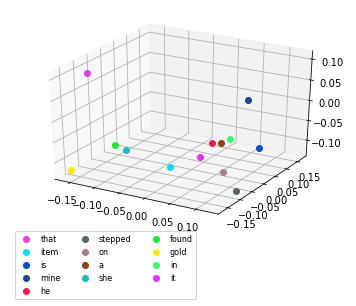

-------------Doc2Vec-------------


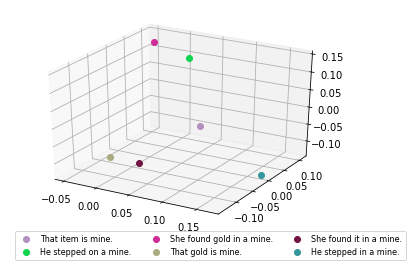

In [16]:
# Visualize 
visualize(model,docs_original)

In [17]:
# Test with new docs
test_docvecs = test(docs_test)

Test Document: «Which of these gold items is mine?»

MOST (2, 0.6434682607650757): «She found gold in a mine.»

MEDIAN (3, -0.679189920425415): «That gold is mine.»

LEAST (0, -0.9329740405082703): «That item is mine.»



Test Document: «Did he find it in a mine?»

MOST (0, 0.6923516988754272): «That item is mine.»

MEDIAN (4, 0.23250553011894226): «She found it in a mine.»

LEAST (5, -0.4712834060192108): «He stepped in a mine.»



Test Document: «She stepped in a mine.»

MOST (5, 0.3391781151294708): «He stepped in a mine.»

MEDIAN (2, -0.21160656213760376): «She found gold in a mine.»

LEAST (1, -0.8276904225349426): «He stepped on a mine.»





-------------Doc2Vec-------------


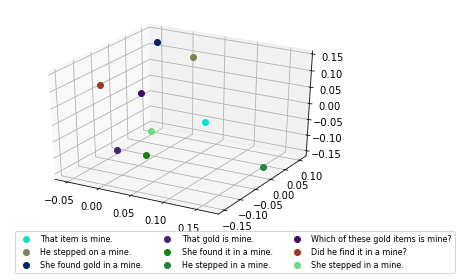

In [11]:
# Visualize test docs as well
visualize(model,docs_original,docs_test,test_docvecs)

In [3]:
############### Implementation Functions (run these first!) ###############

# Transform data (you can add more data preprocessing steps) 
def transform(docs_original):
    docs = []
    analyzedDocument = namedtuple('AnalyzedDocument', 'words tags')
    for i, text in enumerate(docs_original):
        words = text.lower().replace('.','').split()
        tags = [i]
        docs.append(analyzedDocument(words, tags))
    return docs

In [4]:
def visualize(model,docs_original,docs_test=None,test_docvecs=None):
    words = [key for key in model.wv.vocab]
    # Visualize
    if size == 2:
        word_xs=[]
        word_ys=[]
        doc_xs=[]
        doc_ys=[]
        docs=docs_original
        
        for docvec in model.docvecs:
            doc_xs.append(docvec[0])
            doc_ys.append(docvec[1])
        
        if docs_test and test_docvecs:
            for docvec in test_docvecs:
                doc_xs.append(docvec[0])
                doc_ys.append(docvec[1])
            docs+=docs_test
        else:
            for word in model.wv.vocab:
                wordvec = model[word]
                word_xs.append(wordvec[0])
                word_ys.append(wordvec[1])
            print("-------------Word2Vec-------------")
            plot([word_xs,word_ys],words)
        print("-------------Doc2Vec-------------")
        plot([doc_xs,doc_ys],docs)    

    if size == 3:
        word_xs=[]
        word_ys=[]
        word_zs=[]
        doc_xs=[]
        doc_ys=[]
        doc_zs=[]
        docs=docs_original

        for docvec in model.docvecs:
            doc_xs.append(docvec[0])
            doc_ys.append(docvec[1])
            doc_zs.append(docvec[2])
        
        if docs_test and test_docvecs:
            for docvec in test_docvecs:
                doc_xs.append(docvec[0])
                doc_ys.append(docvec[1])
                doc_zs.append(docvec[2]) 
            docs+=docs_test
        else:
            for word in model.wv.vocab:
                wordvec = model[word]
                word_xs.append(wordvec[0])
                word_ys.append(wordvec[1])
                word_zs.append(wordvec[2])
            print("-------------Word2Vec-------------")
            plot([word_xs,word_ys,word_zs],words)
        print("-------------Doc2Vec-------------")
        plot([doc_xs,doc_ys,doc_zs],docs) 

In [5]:
def plot(coordinates,strings):
    if len(coordinates) == 2:
        xs,ys = coordinates
        colors = [np.random.random(3) for c in range(len(xs))]
        scatters = set()
        for x,y,c in zip(xs,ys,colors):
            scatters.add(plt.scatter(x, y, marker='o', color=c))

        plt.legend(scatters,
                   strings,
                   scatterpoints=1,
                   bbox_to_anchor=(1.04,1),
                   ncol=3,
                   fontsize=8
                  )

        plt.show()
    elif len(coordinates) == 3:
        xs,ys,zs = coordinates
        
        colors = [np.random.random(3) for c in range(len(xs))]
        ax = plt.subplot(111, projection='3d')

        scatters = set()
        for x,y,z,c,doc in zip(xs,ys,zs,colors,strings):
            ax.plot([x],[y],[z],'o', color=c, label=doc)

        plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(0, 0))
        plt.show()

In [6]:
def test(docs_test):
    docvecs = []
    for test_doc in docs_test:
        docvec = model.infer_vector(test_doc)
        docvecs.append(docvec)
        sims = model.docvecs.most_similar([docvec], topn=len(model.docvecs))
        print('Test Document: «{}»\n'.format(test_doc))
        for label, index in [('MOST', 0), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
            print(u'%s %s: «%s»\n' % (label, sims[index], docs_original[sims[index][0]]))
        print("\n")
    return docvecs